# Numerically integrated 2D-$tanh$ model

In [32]:
import numpy as np
from scipy.integrate import quad, dblquad
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [88]:


class TanhNetwork2D(object):
    def __init__(self, a0, b0, sigma, prior_sigma, xmin=-1.0, xmax=1.0):
        self.a0 = a0
        self.b0 = b0
        self.sigma = sigma
        self.prior_sigma = prior_sigma
        self.xmin = xmin
        self.xmax = xmax
        
        self.delta_x = self.xmax - self.xmin
        self.learning_curve_rec = {}

    
    
    def _integrand_K(self, x, a, b):
        return (self.a0 * np.tanh(self.b0 * x) - a * np.tanh(b * x)) **2 
    
    def kldiv(self, a, b):
        const = 1 / (2 * self.sigma**2 * self.delta_x)
        integral, err = quad(self._integrand_K, self.xmin, self.xmax, args=(a, b))
        return const * integral
    
    
    def boltzmann_weight(self, a, b, n):
        prior_val = 1 / np.sqrt(2 * np.pi * self.prior_sigma **2) * np.exp(-(a**2 + b**2) / (2 * self.prior_sigma**2))
        return prior_val * np.exp(-n * self.kldiv(a, b))
    
    def partition_fn(self, n):
        integral, err = dblquad(
            self.boltzmann_weight, 
            -np.inf, 
            np.inf, 
            -np.inf, 
            np.inf,
            args=(n,),
            
        )
        return integral
    
    def learning_curve(self, ns, verbose=False, recompute=False):
        ns = np.array(ns, dtype=int)
        ns_plusone = ns + 1
        assert len(set(ns).intersection(set(ns_plusone))) == 0
        for i in range(len(ns)):
            n = ns[i]
            n_plus1 = ns_plusone[i]
            if recompute or (n not in self.learning_curve_rec):
                self.learning_curve_rec[n] = self.partition_fn(n)
            if recompute or (n_plus1 not in self.learning_curve_rec):
                self.learning_curve_rec[n_plus1] = self.partition_fn(n_plus1)
                
            if verbose:
                rec = self.learning_curve_rec
                print(f"{i + 1:>3d} / {len(ns):>3d}: {int(n): >3d}, {rec[n]:.5f}, {rec[n_plus1]: .5f}")
        return np.array([self.learning_curve_rec[n] for n in ns])
    
    def _integrand_generalisation_error(self, a, b, n):
        
        return 
    
    def generalisation_error(self, n):
        
        pass
    
    
    def plot_learning_curve(self):
        rec = self.learning_curve_rec
        df = pd.DataFrame.from_dict(rec, orient="index", columns=["Z_n"]).sort_index()
        df["F_n"] = -np.log(df["Z_n"])


        fig, axes = plt.subplots(2, 2, figsize=(10, 10))

        ax = axes[0][0]
        ax.plot(df.index, df["Z_n"], "kx--")
        ax.set_xlabel("$n$")
        ax.set_title("$Z^0(n)$")

        ax = axes[0][1]
        ax.plot(df.index, df["F_n"], "kx--")
        ax.set_title("$F^0(n)$")
        ax.set_xlabel("$n$")
#         ax.plot(df.index, 0.5 * np.log(df.index) + 1)

        ax = axes[1][0]
        bgs = []
        ns = []
        for n in df.index:
            if n + 1 in df.index:
                ns.append(n)
                bgs.append(df.loc[n + 1, "F_n"] - df.loc[n, "F_n"])
        bgs = np.array(bgs)
        ns = np.array(ns)
        ax.plot(ns, bgs, "kx-")
        ax.plot(ns, 1 / ns, "r--", label="$1 / n$")
        ax.plot(ns, 0.5 / ns, "b--", label="$1 / (2n)$")
        ax.legend()
        ax.set_title(f"$F^0(n + 1) - F^0(n)$")
        ax.set_xlabel("$n$")

        ax = axes[1][1]
        bgs = np.array([df.loc[n + 1, "F_n"] - df.loc[n, "F_n"] for n in ns])
        ax.plot(ns, ns * bgs, "kx-")
        
        ones = np.ones_like(ns)
        ax.plot(ns, 1 * ones, "r--", label="$1$")
        ax.plot(ns, 0.5 * ones, "b--", label="$1 / 2$")

        ax.set_title(f"$n[F^0(n + 1) - F^0(n)]$")
        ax.set_xlabel("$n$")
        return fig, axes
            
    

In [80]:
a0, b0 = 0.5, 0.5
sigma = 0.1
prior_sigma = 10.0
xmin, xmax = -1, 1
tanhnetwork = TanhNetwork2D(a0, b0, sigma, prior_sigma, xmin, xmax)

20


/Users/edmund/.local/share/virtualenvs/phase_transition_in_singular_model-nv7vLSBn/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


  1 /  20: 800, 0.003,  0.003
  2 /  20: 810, 0.003,  0.003
  3 /  20: 820, 0.003,  0.003
  4 /  20: 830, 0.003,  0.003
  5 /  20: 840, 0.003,  0.003
  6 /  20: 850, 0.003,  0.003
  7 /  20: 860, 0.003,  0.003
  8 /  20: 870, 0.003,  0.003
  9 /  20: 880, 0.003,  0.003
 10 /  20: 890, 0.003,  0.003
 11 /  20: 900, 0.003,  0.003
 12 /  20: 910, 0.003,  0.003
 13 /  20: 920, 0.003,  0.003
 14 /  20: 930, 0.003,  0.003
 15 /  20: 940, 0.003,  0.003
 16 /  20: 950, 0.003,  0.003
 17 /  20: 960, 0.003,  0.003
 18 /  20: 970, 0.003,  0.003
 19 /  20: 980, 0.003,  0.003
 20 /  20: 990, 0.003,  0.003


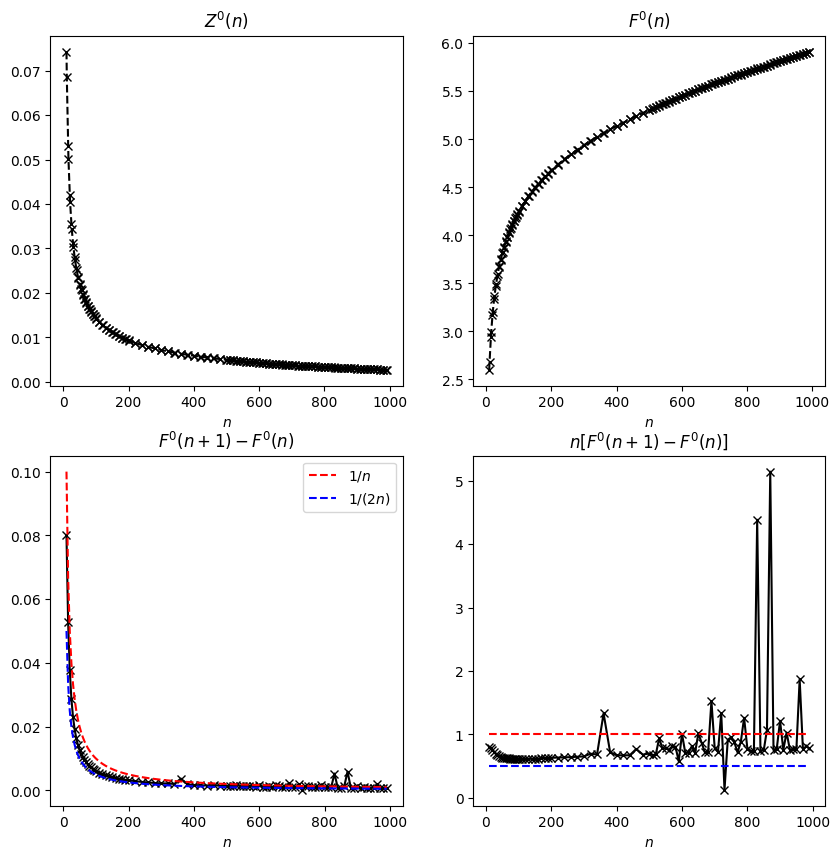

In [85]:
ns = np.arange(800, 1000, 10, dtype=int)
print(len(ns))
tanhnetwork.learning_curve(ns, verbose=True)
fig, axes = tanhnetwork.plot_learning_curve()

In [78]:
a0, b0 = 0.5, 0.5
sigma = 0.1
prior_sigma = 0.5
xmin, xmax = -1, 1
tanhnetwork2 = TanhNetwork2D(a0, b0, sigma, prior_sigma, xmin, xmax)

10
  1 /  10: 670, 0.010,  0.010
  2 /  10: 672, 0.010,  0.010
  3 /  10: 674, 0.010,  0.010
  4 /  10: 676, 0.010,  0.010
  5 /  10: 678, 0.010,  0.010
  6 /  10: 680, 0.010,  0.010
  7 /  10: 682, 0.010,  0.010
  8 /  10: 684, 0.010,  0.010
  9 /  10: 686, 0.010,  0.010
 10 /  10: 688, 0.010,  0.010


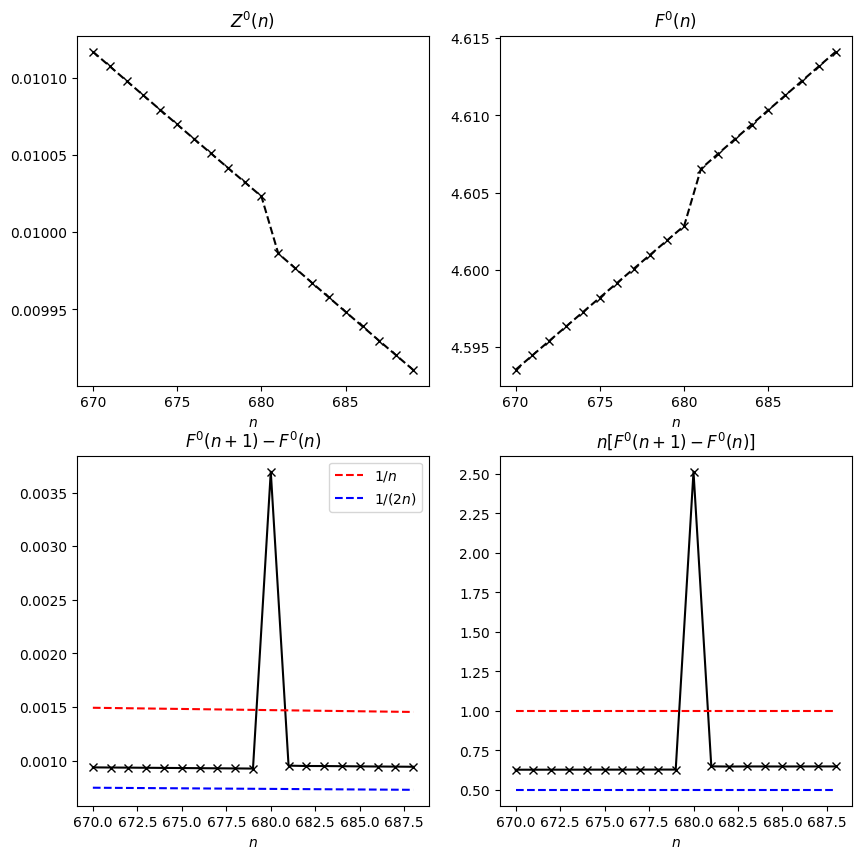

In [79]:
ns = np.arange(670, 690, 2, dtype=int)
print(len(ns))
tanhnetwork2.learning_curve(ns, verbose=True)
fig, axes = tanhnetwork2.plot_learning_curve()

In [97]:
a0, b0 = 1.0, 1.0
sigma = 0.1
prior_sigma = 5.0
xmin, xmax = -2, 2
tanhnetwork3 = TanhNetwork2D(a0, b0, sigma, prior_sigma, xmin, xmax)

19
  1 /  19:  10, 0.00933,  0.00844
  2 /  19:  20, 0.00455,  0.00433
  3 /  19:  30, 0.00301,  0.00291
  4 /  19:  40, 0.00225,  0.00220
  5 /  19:  50, 0.00180,  0.00176
  6 /  19:  60, 0.00150,  0.00147
  7 /  19:  70, 0.00128,  0.00126
  8 /  19:  80, 0.00112,  0.00111
  9 /  19:  90, 0.00100,  0.00098
 10 /  19: 100, 0.00090,  0.00089
 11 /  19: 110, 0.00081,  0.00081
 12 /  19: 120, 0.00075,  0.00074
 13 /  19: 130, 0.00069,  0.00068
 14 /  19: 140, 0.00064,  0.00063
 15 /  19: 150, 0.00060,  0.00059
 16 /  19: 160, 0.00056,  0.00056
 17 /  19: 170, 0.00053,  0.00052
 18 /  19: 180, 0.00050,  0.00049
 19 /  19: 190, 0.00047,  0.00047
CPU times: user 8min 7s, sys: 2.13 s, total: 8min 10s
Wall time: 8min 12s


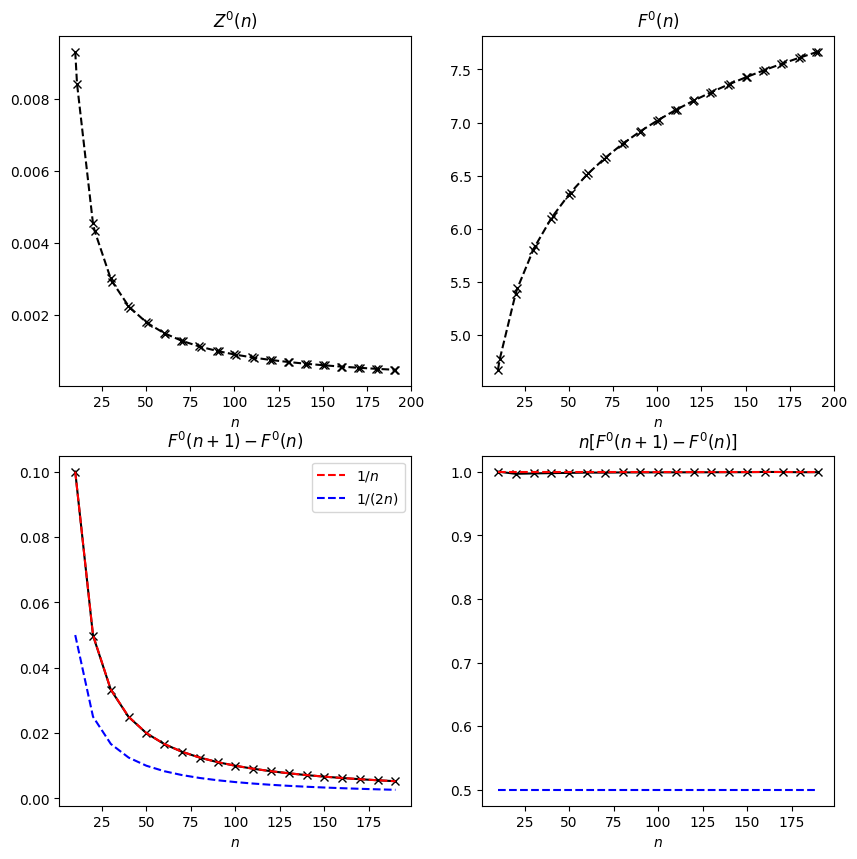

In [98]:
%%time 
ns = np.arange(10, 200, 10, dtype=int)
print(len(ns))
tanhnetwork3.learning_curve(ns, verbose=True)
fig, axes = tanhnetwork3.plot_learning_curve()

In [30]:
a0, b0 = 0.5, 0.5
sigma = 0.1
prior_sigma = 5.0
xmin, xmax = -1, 1
tanhnetwork = TanhNetwork2D(a0, b0, sigma, prior_sigma, xmin, xmax)
%time tanhnetwork.partition_fn(3)

0.25367999707039407

In [43]:
ns = np.linspace(5, 100, num=20)
# rec = {}
for i, n in enumerate(ns):
    rec[n] = tanhnetwork.partition_fn(n)
    rec[n + 1] = tanhnetwork.partition_fn(n + 1)
    print(f"{i:>3d} / {len(ns):>3d}: {int(n): >3d}, {rec[n]:.3f}, {rec[n + 1]: .3f}")

  0 /  20:   6, 0.162
  1 /  20:  11, 0.107
  2 /  20:  16, 0.081
  3 /  20:  21, 0.067
  4 /  20:  26, 0.058
  5 /  20:  31, 0.051
  6 /  20:  36, 0.046
  7 /  20:  41, 0.042
  8 /  20:  46, 0.039
  9 /  20:  51, 0.037
 10 /  20:  56, 0.035
 11 /  20:  61, 0.033
 12 /  20:  66, 0.031
 13 /  20:  71, 0.030
 14 /  20:  76, 0.028
 15 /  20:  81, 0.027


/Users/edmund/.local/share/virtualenvs/phase_transition_in_singular_model-nv7vLSBn/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


 16 /  20:  86, 0.026
 17 /  20:  91, 0.025
 18 /  20:  96, 0.025
 19 /  20: 101, 0.024


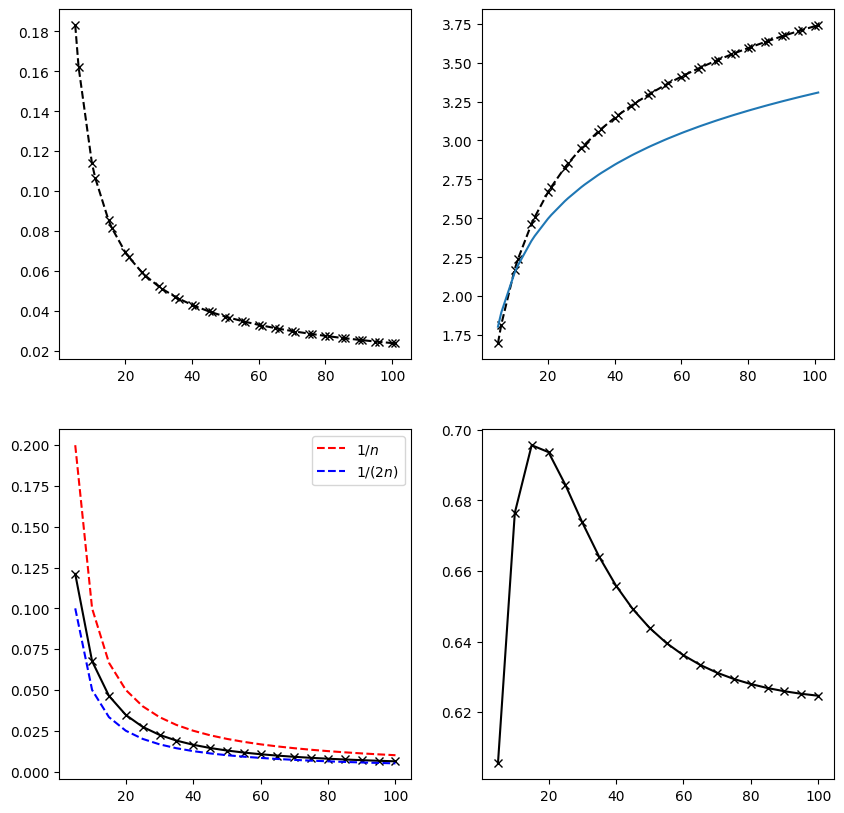

In [60]:
df = pd.DataFrame.from_dict(rec, orient="index", columns=["Z_n"]).sort_index()
df["F_n"] = -np.log(df["Z_n"])


fig, axes = plt.subplots(2, 2, figsize=(10, 10))

ax = axes[0][0]
ax.plot(df.index, df["Z_n"], "kx--")

ax = axes[0][1]
ax.plot(df.index, df["F_n"], "kx--")
ax.plot(df.index, 
        0.5 * np.log(df.index) + 1
       )

ax = axes[1][0]
bgs = np.array([df.loc[n + 1, "F_n"] - df.loc[n, "F_n"] for n in ns])
ax.plot(ns, bgs, "kx-")
ax.plot(ns, 1 / ns, "r--", label="$1 / n$")
ax.plot(ns, 0.5 / ns, "b--", label="$1 / (2n)$")
ax.legend()



ax = axes[1][1]
bgs = np.array([df.loc[n + 1, "F_n"] - df.loc[n, "F_n"] for n in ns])
ax.plot(ns, ns * bgs, "kx-")

# Derivative

In [16]:


def integrand(x, b, a0=1.0, b0=1.0):
    return a0 * np.tanh(b0 * x) * np.tanh(b * x)

b = 0.1

# Set integration limits
xmin, xmax = -2, 2

result, error = quad(integrand, xmin, xmax, args=(b,))
print(f"Integration result: {result}, Error: {error}")


Integration result: 0.3244540281116733, Error: 3.602163462261207e-15


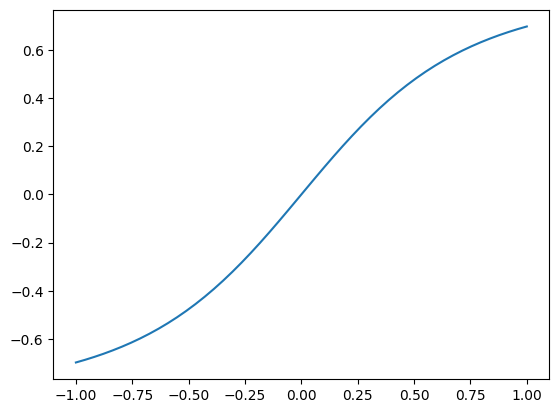

In [21]:
bs = np.linspace(-1.0, 1.0, num=50)
dls = [quad(integrand, xmin, xmax, args=(b, 0.5, 0.5))[0] for b in bs]
plt.plot(bs, dls)